# Tarefa 01
- Gerar análises com a base de dados de acordo com o mês selecionado
- Criar uma função para gerar esses gráficos
- Salvar os gráficos como imagens para utilização posterior em powerpoints ou documentos

Para deixar mais automatizado, criei uma coluna adicional com o mês do nascimento `MESNASC` e uma variável para filtrar o mês de análise desejado. Dessa forma, o script fica mais enxuto e ao mesmo tempo flexível para que as análises sejam facilmente replicadas de acordo com o mês seleicionado.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os


sns.set_theme()  


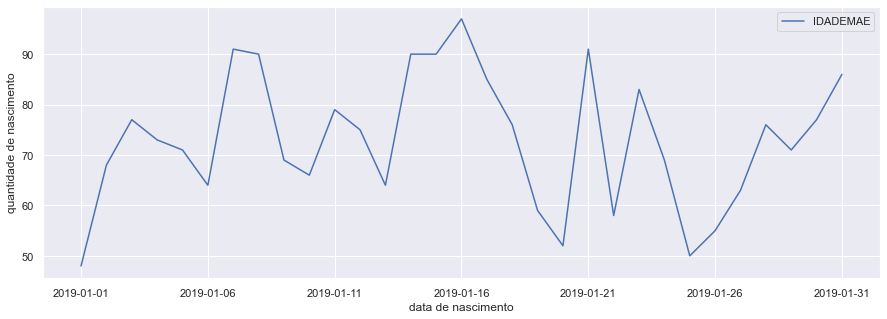

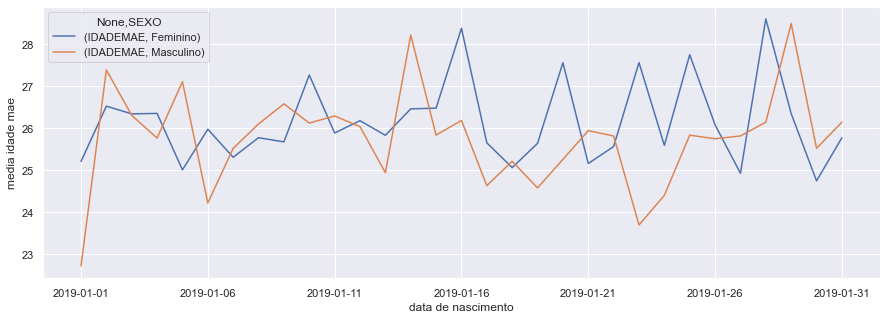

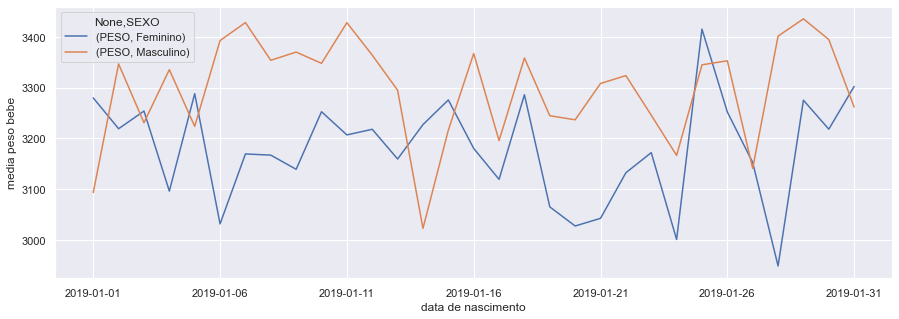

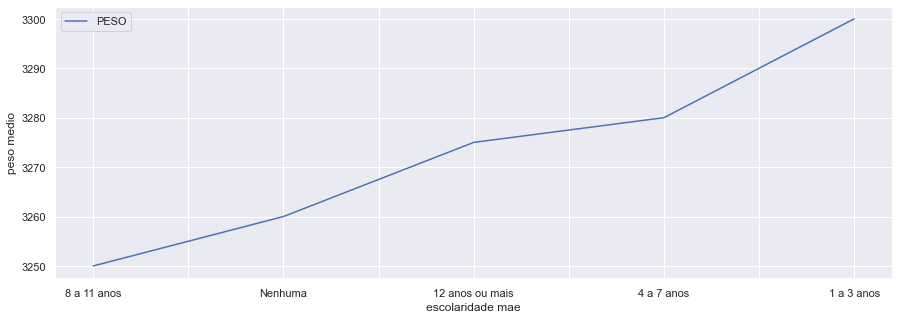

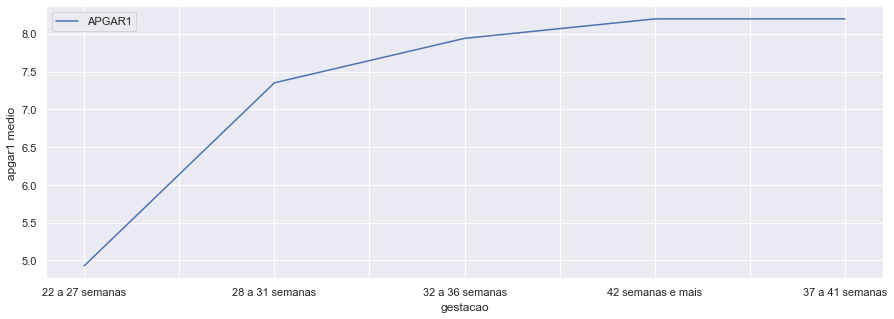

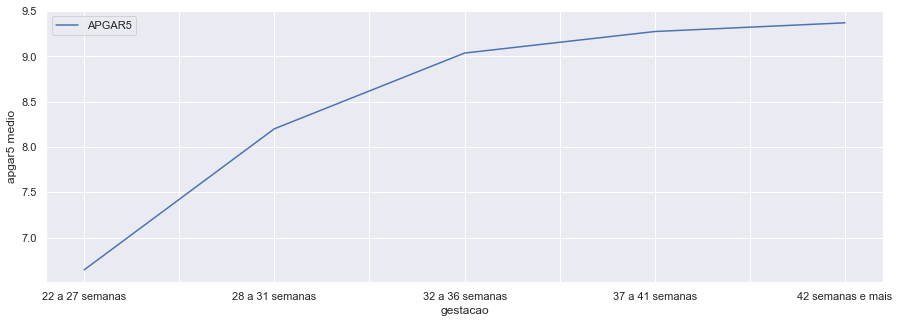

In [5]:
# Utilizando a função do exercício para plotar as pivot tables
def plota_pivot_table(df, value, index, func, ylabel, xlabel, opcao='nada'):
    if opcao == 'nada':
        pd.pivot_table(df, values=value, index=index,
                       aggfunc=func).plot(figsize=[15, 5])
    elif opcao == 'sort':
        pd.pivot_table(df, values=value, index=index,
                       aggfunc=func).sort_values(value).plot(figsize=[15, 5])
    elif opcao == 'unstack':
        pd.pivot_table(df, values=value, index=index,
                       aggfunc=func).unstack().plot(figsize=[15, 5])
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    return None

# Criando função para auxiliar na identificação dos gráficos gerados
def get_month_name(mes):
    month_names = {
        1: 'jan', 2: 'fev', 3: 'mar', 4: 'abr',
        5: 'mai', 6: 'jun', 7: 'jul', 8: 'ago',
        9: 'set', 10: 'out', 11: 'nov', 12: 'dez'
    }
    return month_names.get(mes, 'mes_desconhecido')

# Carregar a base de dados completa
sinasc = pd.read_csv('./input/SINASC_RO_2019.csv')

# Adicionar coluna MESNASC - utilizaremos ela para filtrar o mês selecionado para análise
sinasc['MESNASC'] = pd.to_datetime(sinasc['DTNASC']).dt.month

# Variável para escolher o mês de análise (1 a 12)
mesnasc = 1

# Filtrar os dados para o mês especificado
sinasc_mes = sinasc[sinasc['MESNASC'] == mesnasc]

# Obter o nome do mês para uso nos arquivos de saída
month_name = get_month_name(mesnasc)
max_data = sinasc_mes['DTNASC'].max()[:7]
os.makedirs('./output/figs/' + max_data, exist_ok=True)

plota_pivot_table(sinasc_mes, 'IDADEMAE', 'DTNASC', 'count', 'quantidade de nascimento', 'data de nascimento')
plt.savefig(f'./output/figs/{max_data}/quantidade de nascimento_{month_name}.png')

plota_pivot_table(sinasc_mes, 'IDADEMAE', ['DTNASC', 'SEXO'], 'mean', 'media idade mae', 'data de nascimento', 'unstack')
plt.savefig(f'./output/figs/{max_data}/media idade mae por sexo_{month_name}.png')

plota_pivot_table(sinasc_mes, 'PESO', ['DTNASC', 'SEXO'], 'mean', 'media peso bebe', 'data de nascimento', 'unstack')
plt.savefig(f'./output/figs/{max_data}/media peso bebe por sexo_{month_name}.png')

plota_pivot_table(sinasc_mes, 'PESO', 'ESCMAE', 'median', 'peso medio', 'escolaridade mae', 'sort')
plt.savefig(f'./output/figs/{max_data}/media peso por escolaridade mae_{month_name}.png')

plota_pivot_table(sinasc_mes, 'APGAR1', 'GESTACAO', 'mean', 'apgar1 medio', 'gestacao', 'sort')
plt.savefig(f'./output/figs/{max_data}/media apgar1 por gestacao_{month_name}.png')

plota_pivot_table(sinasc_mes, 'APGAR5', 'GESTACAO', 'mean', 'apgar5 medio', 'gestacao', 'sort')
plt.savefig(f'./output/figs/{max_data}/media apgar5 por gestacao_{month_name}.png')
